In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv('house_price_data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


did some feature selection

<AxesSubplot:>

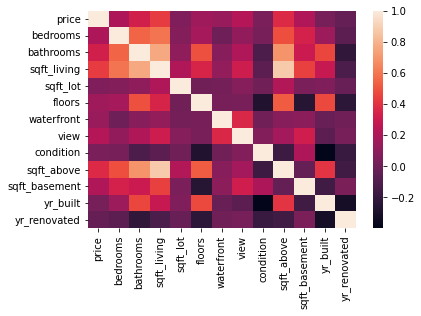

In [3]:
sns.heatmap(df.corr())

In [4]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
y = df['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
lr1=LinearRegression()

In [7]:
lr1.fit(X_train,y_train)

LinearRegression()

In [8]:
y_predict1=lr1.predict(X_test)

In [9]:
score1=r2_score(y_test,y_predict1)

In [10]:
score1

0.032335189956320676

In [11]:
X2 = df[['bedrooms', 'bathrooms', 'sqft_above' ,'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
y2 = df['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [13]:
lr2=LinearRegression()
lr2.fit(X_train,y_train)

LinearRegression()

In [14]:
y_predict2=lr2.predict(X_test)

In [15]:
score2=r2_score(y_test,y_predict2)
score2

0.03172583406157614

### my style

In [16]:
x = df[['bedrooms', 'bathrooms', 'sqft_above','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
y = df['price']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
x_train.head(2)

,bedrooms,bathrooms,sqft_above,sqft_living,sqft_lot,floors,waterfront,view,condition
1898,4.0,2.5,2770,2770,45514,2.0,0,0,4
1370,4.0,3.0,3720,3720,29043,2.0,0,0,3


In [19]:
trf=ColumnTransformer([
    ('scale',StandardScaler(),['sqft_above','sqft_living','sqft_lot'])
],remainder='passthrough')

In [20]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.fit_transform(x_test)


In [21]:
model=LinearRegression()

In [22]:
model.fit(x_train_trf,y_train)

LinearRegression()

In [23]:
y_predict=model.predict(x_test_trf)

In [24]:
scoring=r2_score(y_test,y_predict)

In [25]:
scoring

0.03229759009482114

In [26]:
model2=SGDRegressor(eta0=0.001,alpha=0.4,max_iter=100,penalty='elasticnet',l1_ratio=0.1)
model2.fit(x_train_trf,y_train)
y_predict=model2.predict(x_test_trf)
scoring=r2_score(y_test,y_predict)
scoring

0.0372649281502162

### finaly

In [27]:
model=LinearRegression()
score=cross_val_score(model,x,y,cv=5,scoring='r2',n_jobs=-1)
score.mean()


0.4488647269559037